In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [15]:
cov = [[1, 0.8], [0.8, 1]]
N = 3000
X    = np.linspace(-4, 4, N)
Y    = np.linspace(-4, 4, N)
X, Y = np.meshgrid(X, Y)
data = sp.stats.multivariate_normal.rvs(mean=[0, 0], 
                                        cov=cov, 
                                        size=N)

In [16]:
U, S2, _ = np.linalg.svd(cov)
S = np.diag(np.sqrt(S2))

In [17]:
data_rot = np.linalg.inv(U) @ data.T
data_rot_scaled = np.linalg.inv(S) @ data_rot

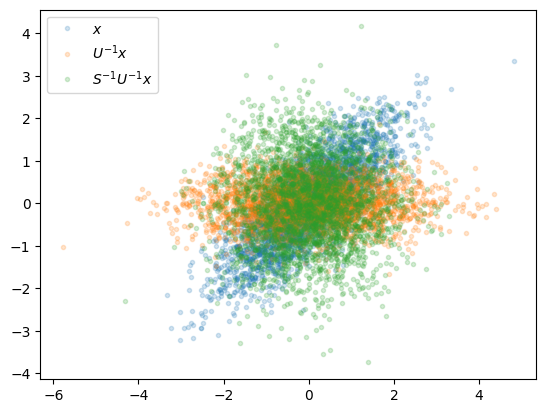

In [26]:
plt.plot(data[:, 0], data[:, 1], '.', alpha=0.2, label=r"$x$")
plt.plot(data_rot[0, :], data_rot[1, :], '.', alpha=0.2, label=r"$U^{-1}x$")
plt.plot(data_rot_scaled[0, :], data_rot_scaled[1, :], '.', alpha=0.2, label=r"$S^{-1}U^{-1}x$")
plt.legend()
plt.savefig("pca.png")
plt.show()